In [1]:
# Import necessary libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy import stats # type: ignore

In [2]:
# Read the data
df = pd.read_csv('synthetic_loan_data.csv')

# Set up the plotting style
sns.set_theme(style="whitegrid", palette="husl")

In [3]:
# Create a function for plotting
def create_subplot_figure(rows, cols, figsize=(15, 15)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.tight_layout(pad=4.0)
    return fig, axes

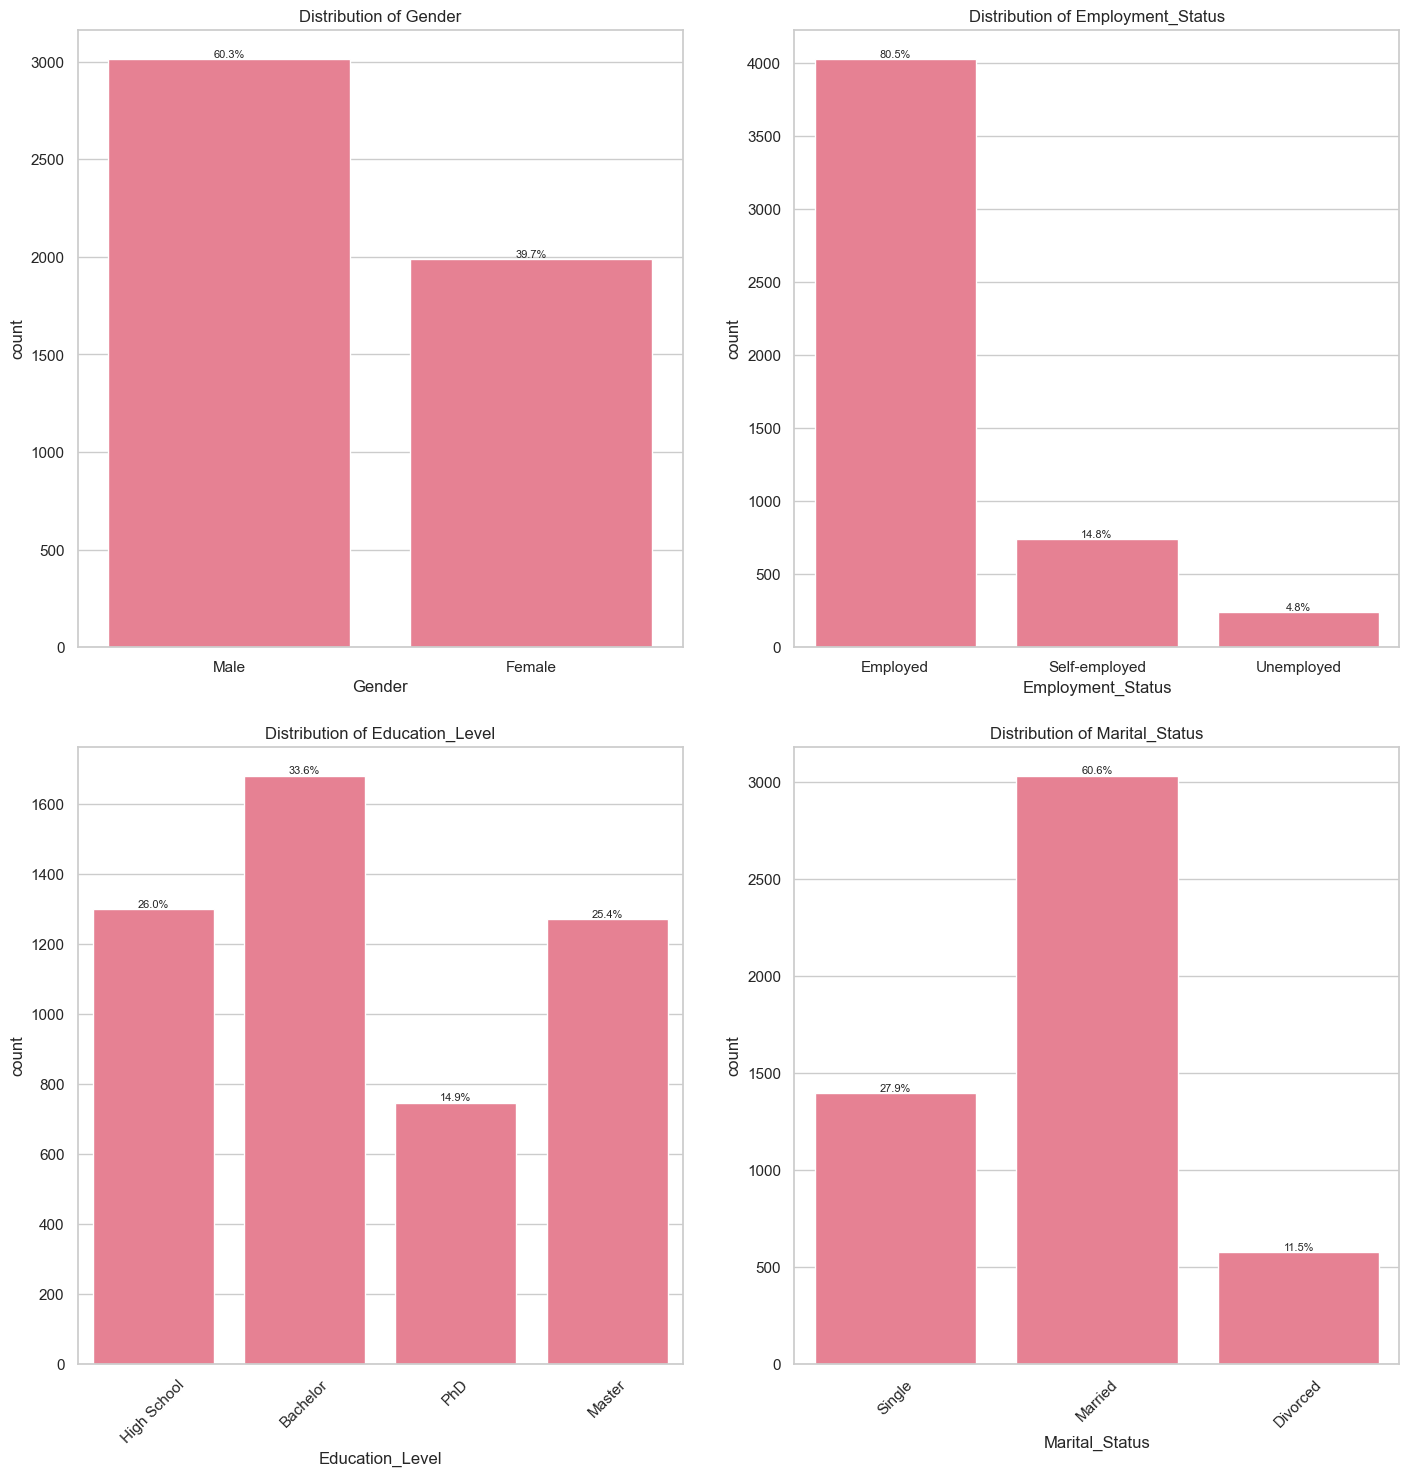

In [ ]:
# 1. Univariate Analysis
fig, axes = create_subplot_figure(2, 2)

for ax, col in zip([axes[0,0], axes[0,1], axes[1,0], axes[1,1]], ['Gender', 'Employment_Status', 'Education_Level', 'Marital_Status']):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Distribution of {col}')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), 
                '{:.1f}%'.format(p.get_height()/len(df)*100),
                ha="center", va="bottom", size=8)
    ax.tick_params(axis='x', rotation=45 if col in ['Education_Level', 'Marital_Status'] else 0)

plt.show()

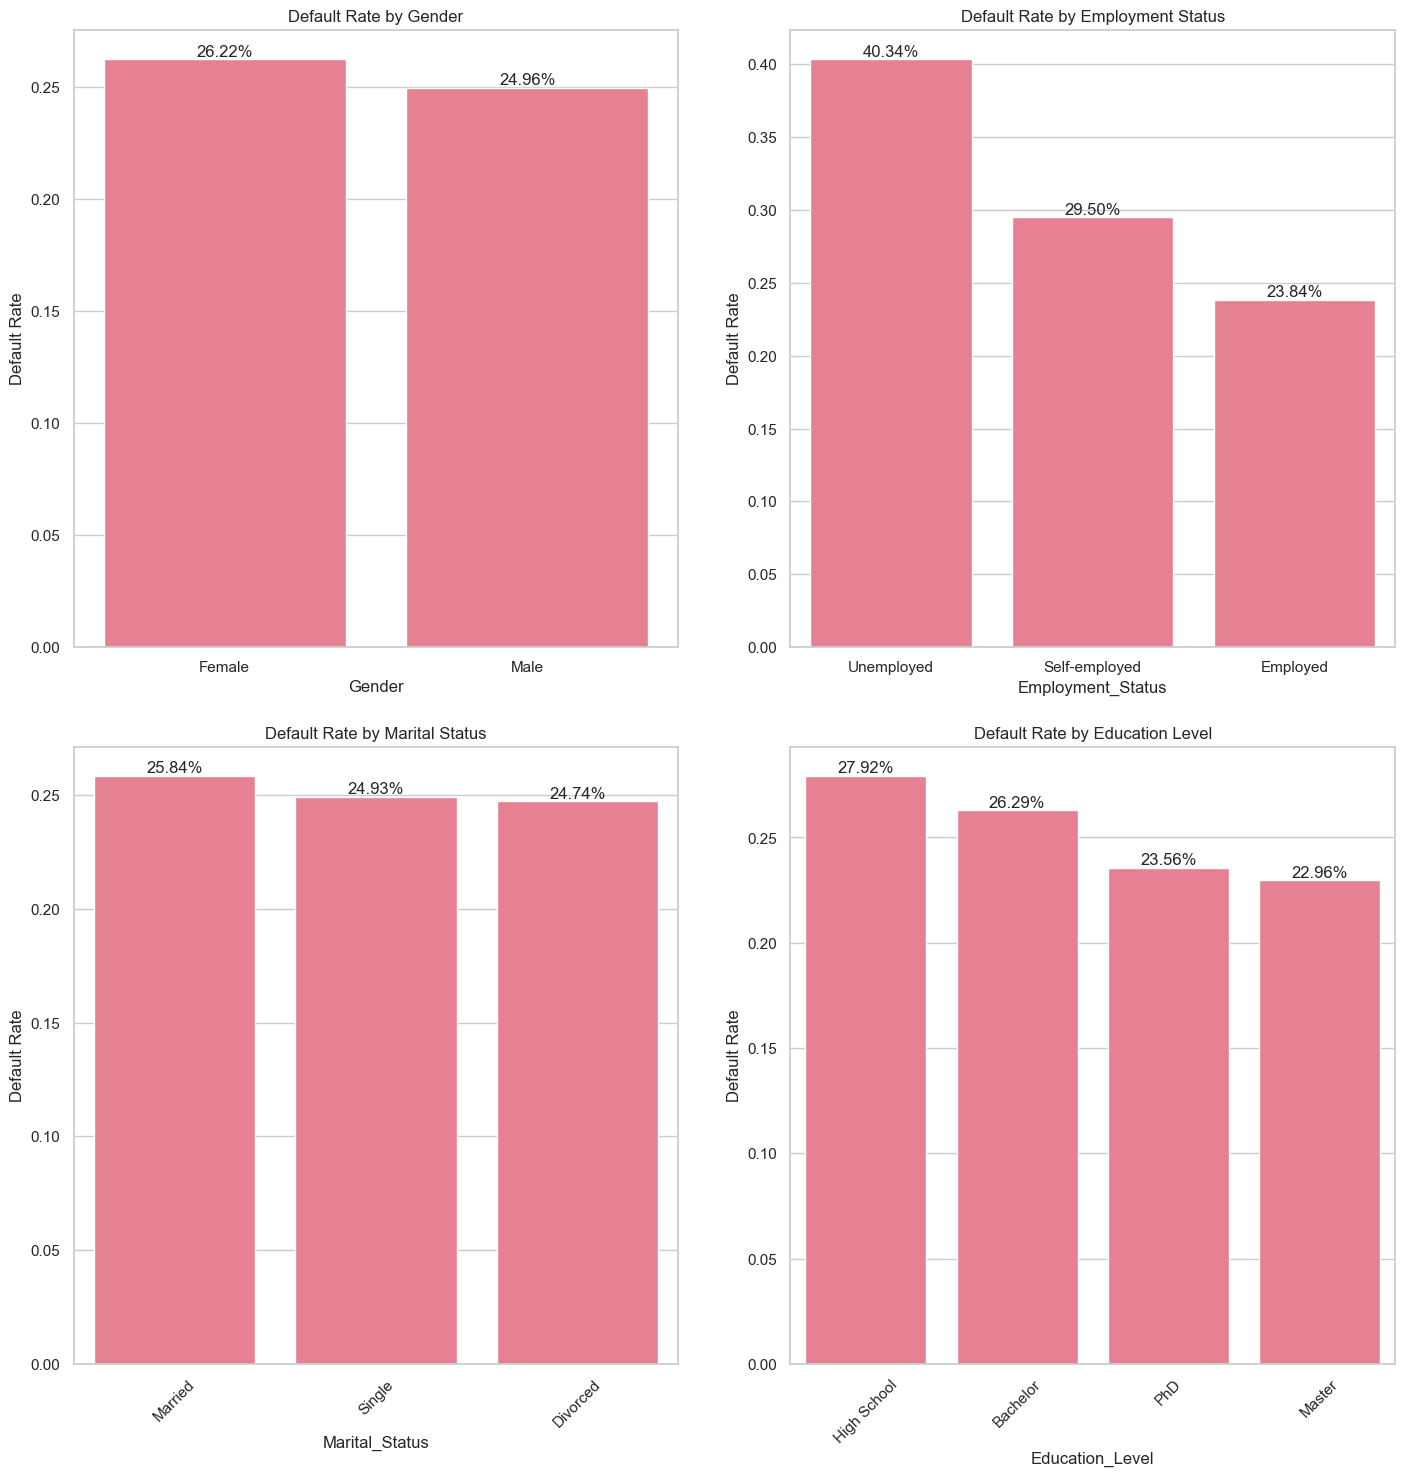

In [13]:
# 2. Default Rate Analysis
fig, axes = create_subplot_figure(2, 2)

# Default rate by gender
default_by_gender = df.groupby('Gender')['Default'].mean().sort_values(ascending=False)
sns.barplot(x=default_by_gender.index, y=default_by_gender.values, ax=axes[0,0])
axes[0,0].set_title('Default Rate by Gender')
axes[0,0].set_ylabel('Default Rate')
axes[0,0].tick_params(axis='x', rotation=0)

# Add percentage labels
for p in axes[0,0].patches:
    height = p.get_height()
    axes[0,0].text(p.get_x() + p.get_width()/2, height, f'{height*100:.2f}%', ha='center', va='bottom')

# Default rate by employment status
default_by_employment = df.groupby('Employment_Status')['Default'].mean().sort_values(ascending=False)
sns.barplot(x=default_by_employment.index, y=default_by_employment.values, ax=axes[0,1])
axes[0,1].set_title('Default Rate by Employment Status')
axes[0,1].set_ylabel('Default Rate')
axes[0,1].tick_params(axis='x', rotation=0)

# Add percentage labels
for p in axes[0,1].patches:
    height = p.get_height()
    axes[0,1].text(p.get_x() + p.get_width()/2, height, f'{height*100:.2f}%', ha='center', va='bottom')

# Default rate by marital status
default_by_marital = df.groupby('Marital_Status')['Default'].mean().sort_values(ascending=False)
sns.barplot(x=default_by_marital.index, y=default_by_marital.values, ax=axes[1,0])
axes[1,0].set_title('Default Rate by Marital Status')
axes[1,0].set_ylabel('Default Rate')
axes[1,0].tick_params(axis='x', rotation=45)

# Add percentage labels
for p in axes[1,0].patches:
    height = p.get_height()
    axes[1,0].text(p.get_x() + p.get_width()/2, height, f'{height*100:.2f}%', ha='center', va='bottom')

# Default rate by education
default_by_education = df.groupby('Education_Level')['Default'].mean().sort_values(ascending=False)
sns.barplot(x=default_by_education.index, y=default_by_education.values, ax=axes[1,1])
axes[1,1].set_title('Default Rate by Education Level')
axes[1,1].set_ylabel('Default Rate')
axes[1,1].tick_params(axis='x', rotation=45)

# Add percentage labels
for p in axes[1,1].patches:
    height = p.get_height()
    axes[1,1].text(p.get_x() + p.get_width()/2, height, f'{height*100:.2f}%', ha='center', va='bottom')

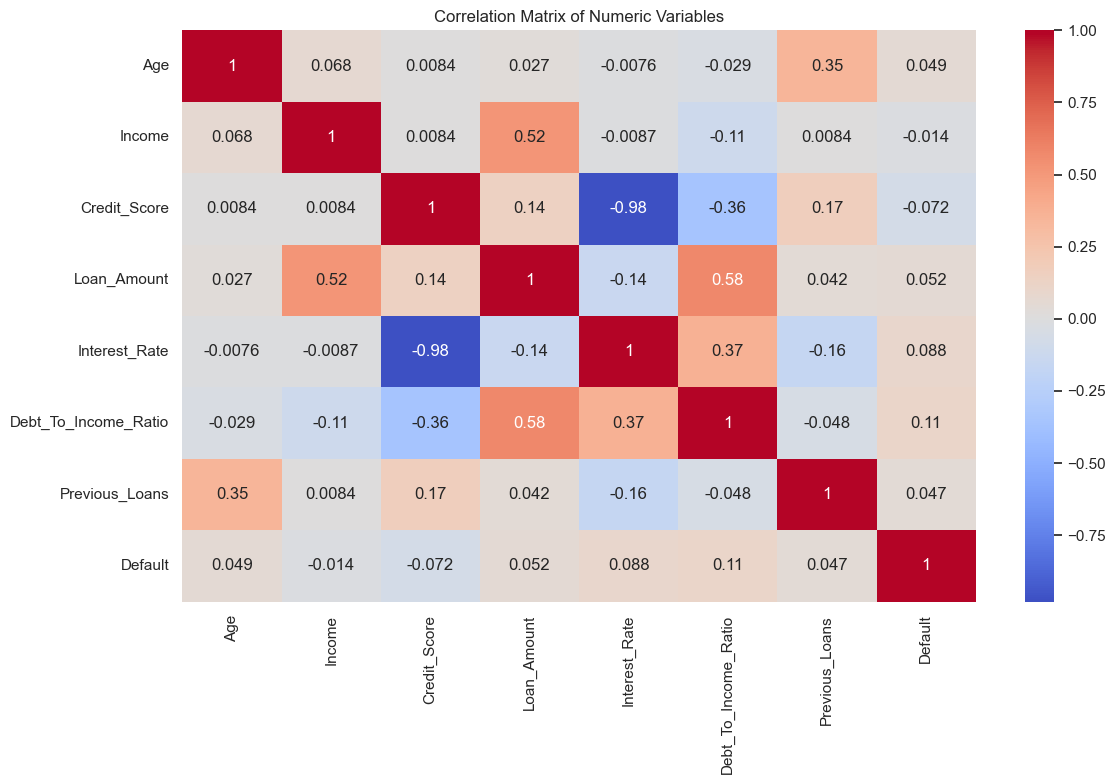

In [23]:
# 3. Correlation Analysis
numeric_columns = ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Interest_Rate', 
                  'Debt_To_Income_Ratio', 'Previous_Loans', 'Default']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()